<div id="content">
    <img class="ribbon" src="img/logo_lncc.png"  style="width: 200px;" align="left"/>
    <img  class="ribbon" src="img/dexl-preto-bg-branco.jpg"  style="width: 200px;" align="right"/>
    <div align="middle">
        <h2 align="middle"> Curso de Verão</h2>
        <h3 align="middle">Exemplos - Análise de dados com Dask</h3>
    </div>
</div>

# Read CSV file

In [1]:
import pandas as pd

### Criar um volume de dados aproximado de 200MB.
!bash concatDataset.sh ../dataset/all_seasons.csv ../dataset/all_seasons200mb.csv 150

In [2]:
%%time
df_pandas = pd.read_csv('../dataset/all_seasons200mb.csv')
df_pandas

CPU times: user 1.91 s, sys: 150 ms, total: 2.06 s
Wall time: 2.05 s


## List some data 

In [3]:
%%time
df_pandas.head()

CPU times: user 137 µs, sys: 32 µs, total: 169 µs
Wall time: 170 µs


,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


## Read with dask dataframe

In [4]:
%%time
import dask.dataframe as dd
from dask import delayed

df_dask = dd.read_csv('../dataset/all_seasons200mb.csv')
df_dask

CPU times: user 167 ms, sys: 11.7 ms, total: 179 ms
Wall time: 253 ms


## List some data

In [5]:
%%time
df_dask.head()

CPU times: user 283 ms, sys: 51.4 ms, total: 335 ms
Wall time: 339 ms


,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


## Do a simple computation

### With Pandas

In [6]:
%%time
df_pandas.groupby('team_abbreviation').age.mean()

CPU times: user 56.4 ms, sys: 0 ns, total: 56.4 ms
Wall time: 54.5 ms


team_abbreviation
ATL    26.903394
BKN    26.700000
BOS    26.651226
CHA    26.299213
CHH    29.056180
CHI    26.810298
CLE    26.953846
DAL    28.250000
DEN    26.569892
DET    27.497207
GSW    26.789894
HOU    27.984085
IND    27.126685
LAC    27.341902
LAL    27.308108
MEM    26.403175
MIA    28.410853
MIL    27.204852
MIN    26.904372
NJN    27.455253
NOH    27.356643
NOK    26.625000
NOP    26.581967
NYK    27.832884
OKC    26.133333
ORL    27.024457
PHI    26.457895
PHX    27.071823
POR    26.539510
SAC    26.784916
SAS    29.103448
SEA    27.395604
TOR    27.033333
UTA    27.008333
VAN    27.138889
WAS    26.910290
Name: age, dtype: float64

### With dask lazy execution

In [7]:
%%time
r = delayed(df_dask.groupby('team_abbreviation').age.mean())

CPU times: user 9.72 ms, sys: 78 µs, total: 9.8 ms
Wall time: 11.9 ms


## Visualize dask dataflow 

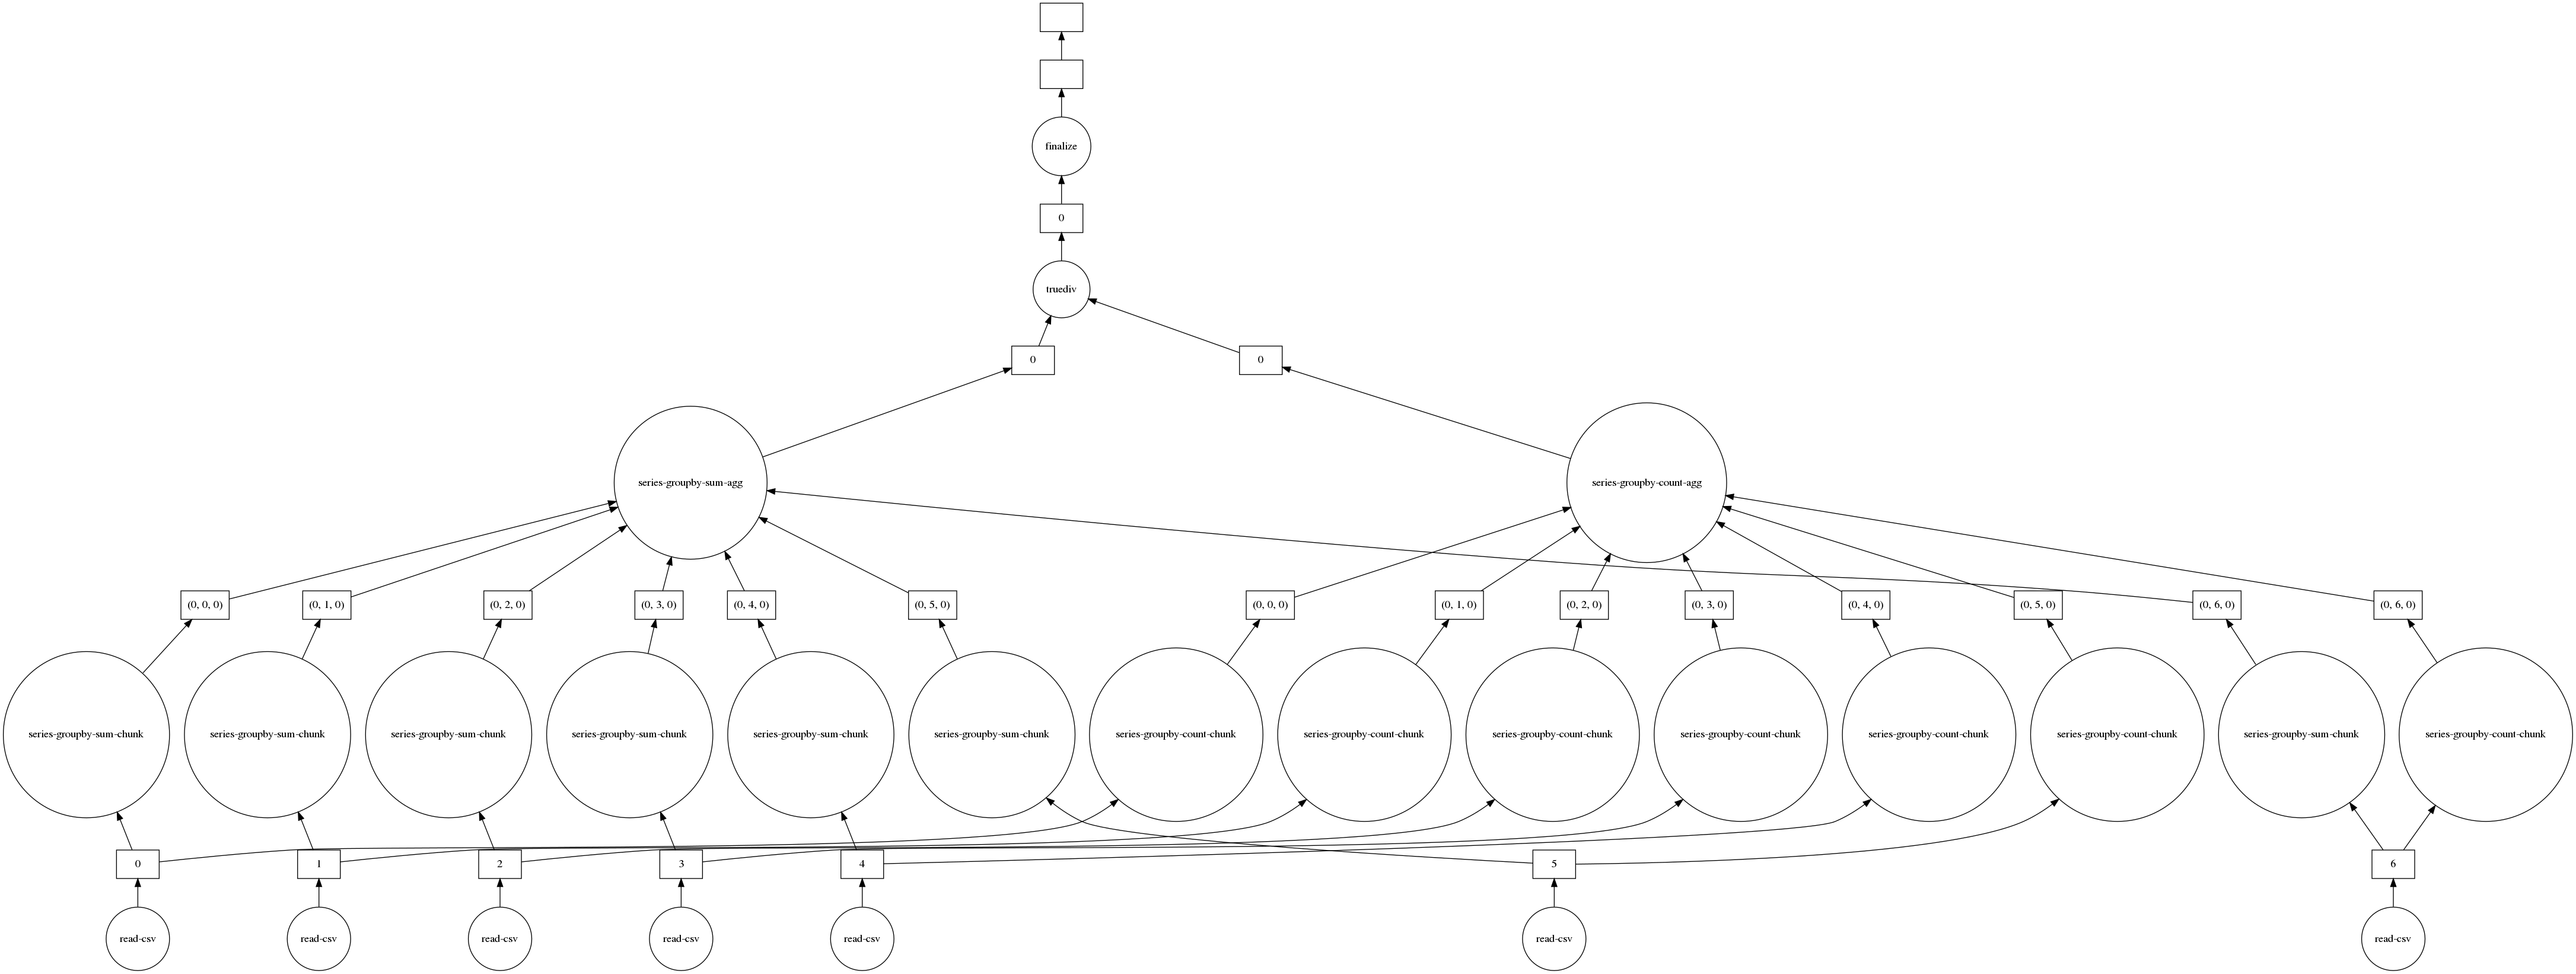

In [8]:
r.visualize()

## Execute dataflow 

In [9]:
%time r.compute()

CPU times: user 2.65 s, sys: 765 ms, total: 3.41 s
Wall time: 1.68 s


team_abbreviation
ATL    26.903394
BKN    26.700000
BOS    26.651226
CHA    26.299213
CHH    29.056180
CHI    26.810298
CLE    26.953846
DAL    28.250000
DEN    26.569892
DET    27.497207
GSW    26.789894
HOU    27.984085
IND    27.126685
LAC    27.341902
LAL    27.308108
MEM    26.403175
MIA    28.410853
MIL    27.204852
MIN    26.904372
NJN    27.455253
NOH    27.356643
NOK    26.625000
NOP    26.581967
NYK    27.832884
OKC    26.133333
ORL    27.024457
PHI    26.457895
PHX    27.071823
POR    26.539510
SAC    26.784916
SAS    29.103448
SEA    27.395604
TOR    27.033333
UTA    27.008333
VAN    27.138889
WAS    26.910290
Name: age, dtype: float64

# Exercise

## Consider reading three CSV files with pd.read_csv and then measuring their total length. We will consider how you would do this with ordinary Python code, then build a graph for this process using delayed, and finally execute this graph using Dask, for a handy speed-up factor of more than two (there are only three inputs to parallelize over).

In [10]:
!cp ../dataset/all_seasons200mb.csv ../dataset/all_seasons1.csv
!cp ../dataset/all_seasons200mb.csv ../dataset/all_seasons2.csv
!cp ../dataset/all_seasons200mb.csv ../dataset/all_seasons3.csv

In [11]:
import pandas as pd
import os
filenames = [os.path.join('../dataset', 'all_seasons%d.csv' % i) for i in [1, 2, 3]]
filenames

['../dataset/all_seasons1.csv',
 '../dataset/all_seasons2.csv',
 '../dataset/all_seasons3.csv']

## Sequential code

In [12]:
%%time

a = pd.read_csv(filenames[0])
b = pd.read_csv(filenames[1])
c = pd.read_csv(filenames[2])

na = len(a)
nb = len(b)
nc = len(c)

total = sum([na, nb, nc])
print(total)

5015250
CPU times: user 5.55 s, sys: 456 ms, total: 6.01 s
Wall time: 6 s


## Your task is to recreate this graph again using the delayed function on the original Python code. The three functions you want to delay are pd.read_csv, len and sum..

In [13]:
delayed_read_csv = delayed(pd.read_csv)
a = delayed_read_csv(filenames[0])
...

total = ...

# execute
%time total.compute()

AttributeError: 'ellipsis' object has no attribute 'compute'

## Possible answer

In [14]:
delayed_read_csv = delayed(pd.read_csv)
a = delayed_read_csv(filenames[0])
b = delayed_read_csv(filenames[1])
c = delayed_read_csv(filenames[2])

delayed_len = delayed(len)
na = delayed_len(a)
nb = delayed_len(b)
nc = delayed_len(c)

delayed_sum = delayed(sum)

total = delayed_sum([na, nb, nc])
%time print(total.compute())

5015250
CPU times: user 6.27 s, sys: 1.71 s, total: 7.99 s
Wall time: 3.92 s


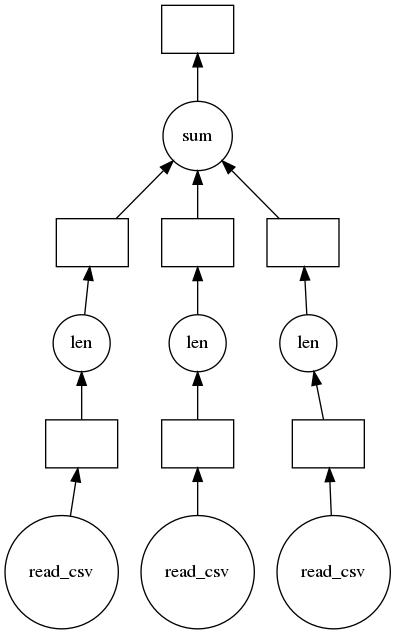

In [15]:
total.visualize()

# Write to Parquet

## With Pandas

In [16]:
df_pandas.to_parquet('all_seasons_pandas.parquet', engine='pyarrow')

## With Dask

In [17]:
df_dask.to_parquet('all_seasons.parquet', engine='pyarrow')